# Sentiment Analysis on Amazon Reviews using NLP and Transformers

### 1. Introduction
#### This project aims to analyze Amazon reviews using both traditional and deep learning NLP models.
#### We will compare VADER (a lexicon-based model) with RoBERTa (a transformer-based model) to determine sentiment accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/arifazhan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/arifazhan/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arifazhan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### 2. Load and Explore Data


In [91]:
# Read in data
df = pd.read_csv('/Users/arifazhan/Desktop/PersonalProjects/Sentiment Analysis/Reviews.csv')
df = df.head(500)
print(df.shape)

(500, 10)


In [92]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 3. Exploratory Data Analysis (EDA)

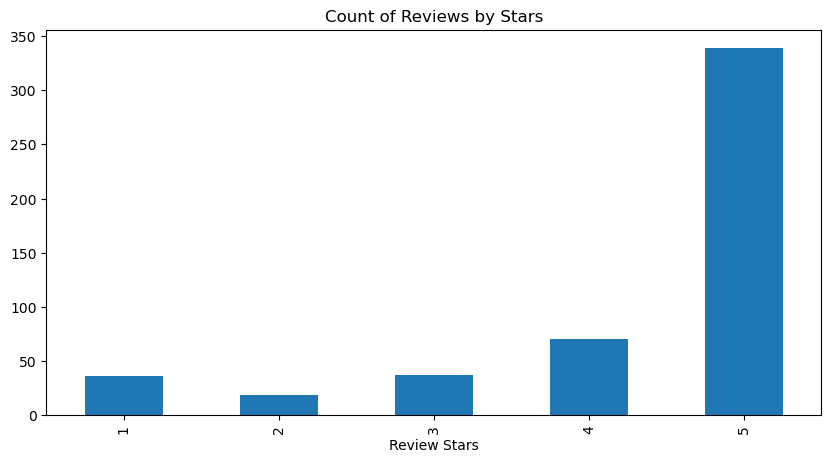

In [208]:
# Visualizing the distribution of review scores.
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## 4. Basic NLP Processing

In [212]:
# Example text for NLP processing
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [214]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenization and Part-of-Speech (POS) tagging
tokens = nltk.word_tokenize(example)
print("Tokens:", tokens[:10])  # Display the first 10 tokens

# Perform part-of-speech tagging
tagged = nltk.pos_tag(tokens)
print("POS Tags:", tagged)

Tokens: ['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']
POS Tags: [('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it', 'PRP'), ('.', '.'), ('Quaker', 'NNP'), ('Oats', 'NNPS'), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')]


[nltk_data] Downloading package punkt to /Users/arifazhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arifazhan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

## 4. Named Entity Recognition (NER)

In [99]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## 6. Sentiment Analysis using VADER
### VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bags of words approach


we will use NLTK's SentimentIntensityAnalyzer that assigns positive, negative, and neutral scores to text.

This uses a "bag of words" approach:
1. Stop words are removed
2. Each word is scored and combined to a total score.

In [101]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [102]:
sia

In [103]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [104]:
example = df['Text'][50]
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [218]:
# Compute sentiment scores for all reviews
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [220]:
# Convert results into a DataFrame
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [107]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

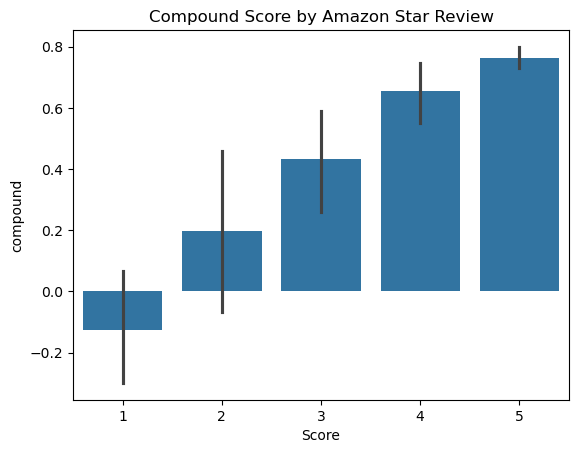

In [109]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

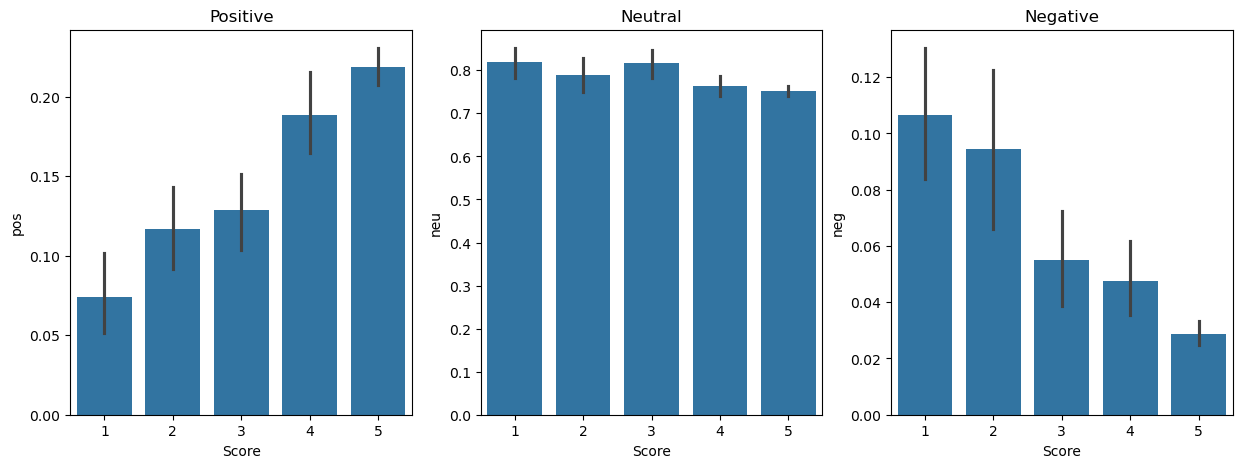

In [110]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show

VADER (Valence Aware Dictionary and sEntiment Reasoner) works on a word-by-word basis, so it might not always capture the full context of human language. For example, sarcasm can contain negative words, but their meaning in context may not actually be negative.

To address this limitation, we can use RoBERTa, a pretrained model based on Transformer deep learning architecture, which is better at understanding the context of a sentence.

We’ll utilize Hugging Face, a leading platform for implementing these advanced NLP models, to achieve more accurate results.

## 7. Transformer-based Sentiment Analysis using RoBERTa
### RoBERTa is a transformer-based model that captures contextual meaning more effectively than VADER.

In [112]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [113]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [114]:
pip install torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [115]:
import torch
print(torch.__version__)  # Should print the installed version
print(torch.cuda.is_available())  # True if GPU is available, else False


2.5.1
False


In [116]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

print("Model loaded successfully!")

Model loaded successfully!


In [117]:
# Vader results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [118]:
# Run Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2],
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.0029573722}


In [119]:
# Define function for RoBERTa sentiment analysis
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2],
    }
    return scores_dict

In [120]:
# Compute sentiment scores for all reviews using both VADER & RoBERTa
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

both

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


{'neg': 0.0,
 'neu': 0.678,
 'pos': 0.322,
 'compound': 0.9811,
 'roberta_neg': 0.0024397594,
 'roberta_neu': 0.011327231,
 'roberta_pos': 0.986233}

In [149]:
# Convert combined results into DataFrame
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [151]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 8. Compare Sentiment Scores Across Models


In [157]:
results_df = results_df.rename(columns={
    'neg': 'vader_neg',
    'neu': 'vader_neu',
    'pos': 'vader_pos'
})
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

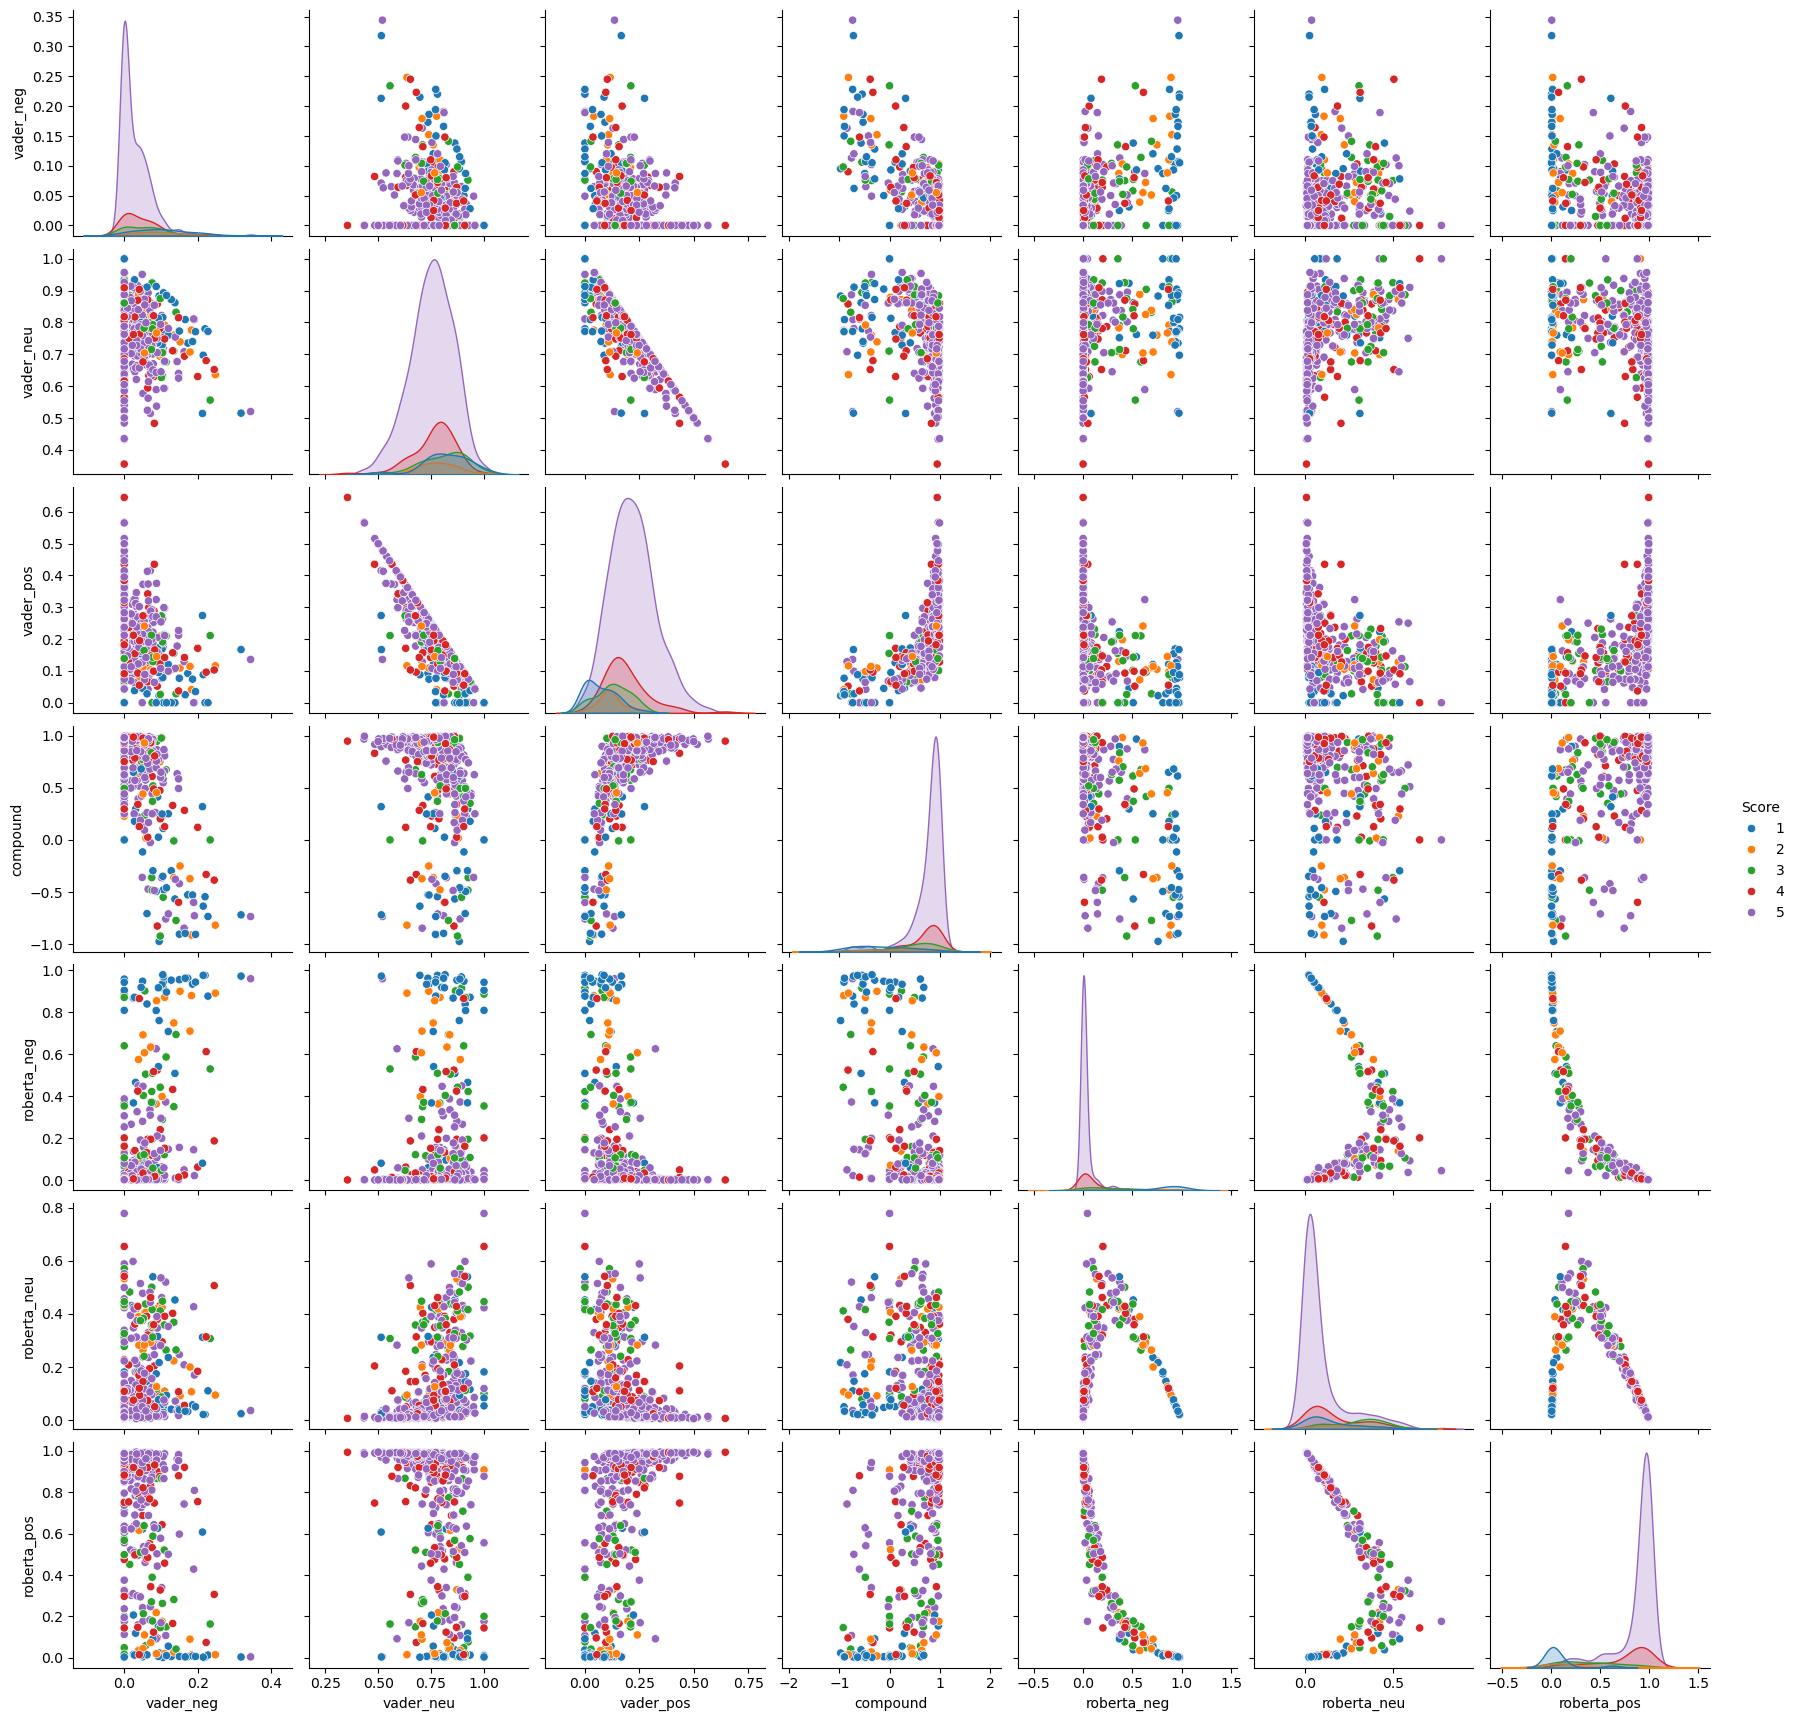

In [228]:
# Compare sentiment scores using pairplots
sns.pairplot(data=results_df, vars= ['vader_neg', 'vader_neu', 'vader_pos', 'compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
            hue = 'Score',
            palette='tab10')
plt.show()

### Conclusions from the Pairplot Analysis

Correlation Between VADER and RoBERTa Sentiments

- There is a strong correlation between vader_pos and roberta_pos, as well as vader_neg and roberta_neg.
- However, roberta_pos tends to be more extreme in its predictions compared to vader_pos, meaning RoBERTa assigns stronger sentiment polarity.

Sentiment Distribution for Different Star Ratings

- 5-star reviews tend to have higher positive sentiment scores (vader_pos, roberta_pos) and lower negative scores.
- 1-star reviews have the opposite trend: higher vader_neg and roberta_neg scores.
- Mid-range scores (2-3 stars) show a more scattered distribution across all sentiment scores, indicating mixed or neutral reviews.

Compound Score Trends

- The compound score (from VADER) is highly concentrated around 0 for neutral reviews and more extreme for very positive/negative reviews.
- This suggests that VADER compound scores are effective at distinguishing strong sentiment but may struggle with subtle variations.

Differences Between VADER and RoBERTa

- RoBERTa’s negative scores (roberta_neg) tend to be more extreme, likely due to its contextual understanding.
- VADER relies on word-level sentiment and sometimes gives more moderate scores, even for strongly positive or negative reviews.
- The scatter in negative sentiment predictions suggests that some reviews labeled as "negative" by VADER are not as strongly negative in RoBERTa’s perspective, meaning contextual nuances are detected differently.

Neutral Sentiment Analysis

- VADER's vader_neu and RoBERTa's roberta_neu do not always align.
- Some reviews with high neutral scores in VADER still have a significant positive or negative score in RoBERTa.
- This could indicate that VADER is overestimating neutrality in some cases.
             

Reviewing 1 star ratings that are deemed postive by both models

In [167]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [171]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

Reviewing 5 star ratings that are deemed negative by both models

In [175]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [177]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## The Transformers Pipeline
Quick and easy way to run sentiment predictions

In [185]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use mps:0


In [189]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [193]:
sent_pipeline('Oranges are bad')

[{'label': 'NEGATIVE', 'score': 0.999757707118988}]

In [195]:
sent_pipeline('My name is Arif')

[{'label': 'POSITIVE', 'score': 0.9919257760047913}]

## 10. Conclusion
This project compares VADER (a lexicon-based model) and RoBERTa (a deep learning model) for sentiment analysis.
 - VADER works well for simple sentiment classification but struggles with sarcasm and complex phrases.
 - RoBERTa provides better contextual understanding but requires more computational resources.
 - The Hugging Face pipeline offers a quick and efficient way to analyze sentiment in real-time.
